# Define and apply a projective transform in 2D from control points
This example also shows the difference with the affine transform approach  
O. Kaufmann, 2023.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point, LinearRing
from geometron.geometries import transforms as ggt
from geometron.plot import geometries as gpg

In [2]:
def plot_transform(origin_gcp, destination_gcp, transformed_gcp, ls, Ls, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = plt.gcf()
    for p in origin_gcp:
        i = origin_gcp.index(p)
        gpg.plot_shapely_obj(obj=p, ax=ax, color='g', marker='o', label='GCP - origin' if i == 0 else '_no_legend_')
    for p in destination_gcp:
        i = destination_gcp.index(p)
        gpg.plot_shapely_obj(obj=p, ax=ax, markeredgecolor='r', markerfacecolor='r', marker='o', label='GCP - destination' if i == 0 else '_no_legend_')
    for p in transformed_gcp:
        i = transformed_gcp.index(p)
        gpg.plot_shapely_obj(obj=p, ax=ax, markeredgecolor='k', markerfacecolor='w', marker='o', alpha=0.5, label='GCP - transformed' if i == 0 else '_no_legend_')

    for i in range(len(transformed_gcp)):
        ax.plot([origin_coords[i][0], transformed_gcp[i].x], [origin_coords[i][1], transformed_gcp[i].y], '--k', linewidth=0.75)
        ax.plot([transformed_gcp[i].x, destination_coords[i][0]], [transformed_gcp[i].y, destination_coords[i][1]], '-.k', linewidth=0.25)

    gpg.plot_shapely_obj(obj=ls, ax=ax, color='g', marker='x', label='object - origin')
    gpg.plot_shapely_obj(obj=Ls, ax=ax, color='r', marker='x', label='object - transformed')
    ax.axis('equal')
    ax.legend(loc='lower right')

# Sample data

In [3]:
origin_coords = [np.array([0.,0.]), np.array([0.,20.]), np.array([10.,0.]), np.array([10.,24.])]
destination_coords = [np.array([20.,30.]), np.array([20.,40.]), np.array([30.,30.]), np.array([40.,52.])]
ls = LinearRing([[0,5], [5,5], [20,5], [20,20], [7.5,20], [7.5, 22.5], [5, 22.5], [5, 15], [0, 10]])

In [4]:
origin_gcp = [Point(p) for p in origin_coords]
destination_gcp = [Point(p) for p in destination_coords]

# Affine transform

## Compute matrix

In [5]:
transform_matrix_affine, residuals, rank, singular = ggt.affine_transform_matrix(origin_coords, destination_coords)

## Apply transform

In [6]:
transformed_gcp_affine = [ggt.affine_transform(p, transform_matrix_affine) for p in origin_gcp]
Ls_affine = ggt.affine_transform(ls, transform_matrix_affine)

# Projective transform

In [7]:
transform_matrix, residuals, rank, singular = ggt.projective_transform_matrix(origin_coords, destination_coords, rcond=-1)

## Apply projective transform

In [8]:
transformed_gcp_projective = [ggt.projective_transform(p, transform_matrix) for p in origin_gcp]
Ls_projective = ggt.projective_transform(ls, transform_matrix)

# Comparison

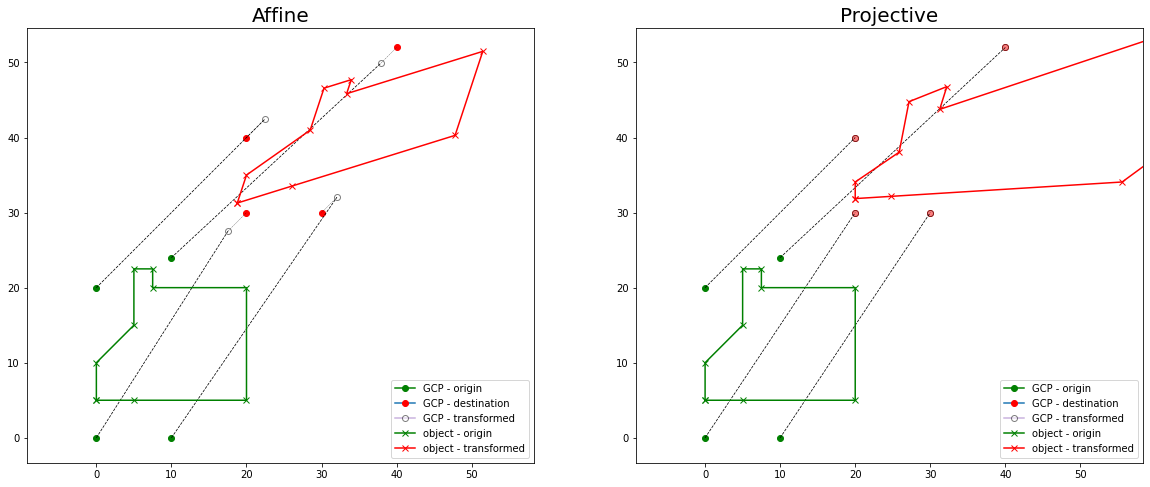

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(20,8))
plot_transform(origin_gcp, destination_gcp, transformed_gcp_affine, ls, Ls_affine, ax=ax[0])
plot_transform(origin_gcp, destination_gcp, transformed_gcp_projective, ls, Ls_projective, ax=ax[1])
xlim = (min(ax[0].get_xlim(), ax[1].get_xlim())[0], max(ax[0].get_xlim(), ax[1].get_xlim())[1])
ylim = (min(ax[0].get_ylim(), ax[1].get_ylim())[0], max(ax[0].get_ylim(), ax[1].get_ylim())[1])
ax[0].set_title('Affine', fontsize=20.)
ax[1].set_title('Projective', fontsize=20.)
plt.setp(ax, xlim=xlim, ylim=ylim);